Random forest
1. Articles:
   - [random forest regression](https://medium.com/@sumbatilinda/random-forests-regression-by-example-1baa062506f5)
     - ps: it's pretty detailed for the lill things like data preprocessing and so, pretty good one :>
   - [geek for geeks](https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/)
2. StatQuest:
   - [part 1](https://youtu.be/J4Wdy0Wc_xQ?si=AiNXX_5SAhMQPfhr)
     - [boot strapping](https://www.sapien.io/glossary/definition/bootstrapped-dataset)
   - [part 2](https://youtu.be/sQ870aTKqiM?si=KQtVByyMnUwpvKL7)

## Medium's Article
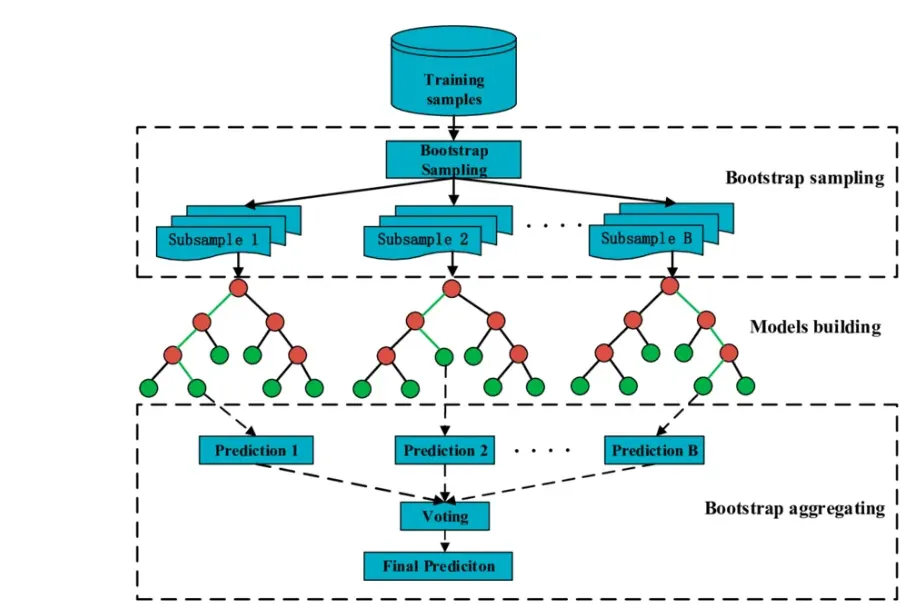

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
x = df[['Level']]
#[[]] not [] cus insuring x would remain df even when selecting single col.
y = df['Salary']

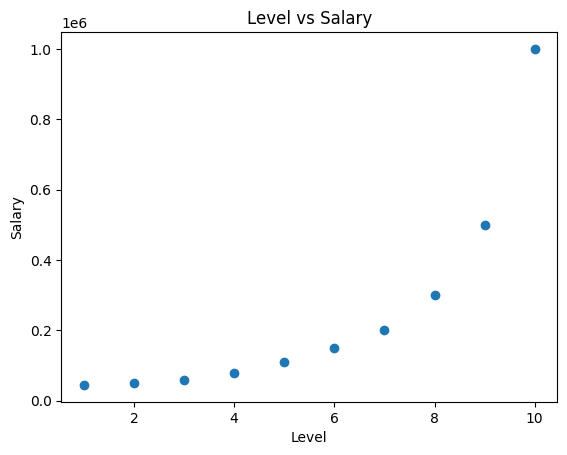

In [4]:
plt.scatter(x,y) 
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [8]:
# SCALING
scaler = StandardScaler()

#intended to convert to numpy array to use newaxis indexing method => got error as it added waaay too much axisess, didn't match the fit_Transform function criteria, instead, use usual reshape :>
x_scaled = scaler.fit_transform(x.values.reshape(-1, 1))

#splittttttt
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [ ]:
rand_forest = RandomForestRegressor(n_estimators=100, max_depth=5)
rand_forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = rand_forest.predict(x_test)
#comp R+SME
print("rmse: ", np.sqrt(mean_squared_error(y_test, y_pred)))

rmse:  196630.93601974234


In [15]:
lbl_encoder = LabelEncoder()
x_cat = df.select_dtypes(include=['object']).apply(lbl_encoder.fit_transform)
x_num = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_num), x_cat], axis = 1).values
# turn all categorical data 'objects' into numeric values + concat them along with numeric features into one long feature vector to feed to the model
# was supposed to use OrdinalEncoder for features encoding cuz lblencoder is obvi for labels, but it works with independent small features as well.

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(x,y)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [23]:
# evaluating
oob_score = regressor.oob_score_
print(f"out of bag score:  {oob_score}")

pred = regressor.predict(x)
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
print(f"mse: {mse}, r2 score: {r2}")

out of bag score:  0.644879832593859
mse: 2647325000.0, r2 score: 0.9671801245316117


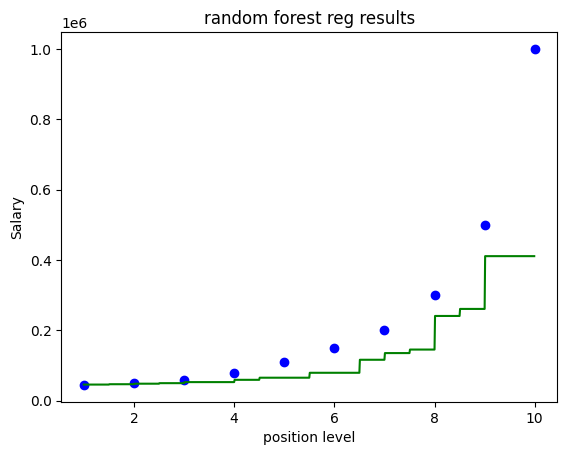

In [26]:
import numpy as np

# Generate a grid of Level values
x_grid_level = np.arange(min(df['Level']), max(df['Level']), 0.01)

# Since the model expects two numerical features and one categorical, we need to create a dummy array
# The categorical feature will be set to 0 for all grid points for simplicity
x_grid = np.zeros((len(x_grid_level), 3))
x_grid[:, 0] = x_grid_level  # Level
# x_grid[:, 1] remains 0 (this was originally Salary in x_num, but it's not needed for prediction)
# x_grid[:, 2] remains 0 (this is the encoded 'Position')

plt.scatter(x[:,0], y, color='blue') #real points
plt.plot(x_grid[:,0], regressor.predict(x_grid), color='green') #pred points

plt.title("random forest reg results")
plt.xlabel("position level")
plt.ylabel("Salary")
plt.show()